### **Data Visualization for The Loans Data**

In this analysis we will explore the data of bank loans and understand the risk of the borrowers. Plus we will answer some of the key questions about the borrowers and their ability to pay.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Notebook Data/prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,...,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,...,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,...,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,

## `Data Cleaning`

In [3]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [31]:
df.shape

(113937, 81)

**Variables of Interest:**

1.   Borrower APR
2.   Loan Status
3.   Occupation
3.   Credit Score Range Lower
4.   Available Bankcard Credit
5.   Debt to Income Ratio




In [32]:
# Let's create a new dataframe that takes the variables of interest
df_vis = df[['BorrowerAPR','LoanStatus', 'Occupation', 'CreditScoreRangeLower', 'AvailableBankcardCredit', 'DebtToIncomeRatio']]
df_vis.head()

,BorrowerAPR,LoanStatus,Occupation,CreditScoreRangeLower,AvailableBankcardCredit,DebtToIncomeRatio
0,0.16516,Completed,Other,640.0,1500.0,0.17
1,0.12016,Current,Professional,680.0,10266.0,0.18
2,0.28269,Completed,Other,480.0,NaN,0.06
3,0.12528,Current,Skilled Labor,800.0,30754.0,0.15
4,0.24614,Current,Executive,680.0,695.0,0.26


In [45]:
max(df_vis.DebtToIncomeRatio)

10.01

### **The NaN Values**

In [33]:
df_vis.isna().sum()

BorrowerAPR                  25
LoanStatus                    0
Occupation                 3588
CreditScoreRangeLower       591
AvailableBankcardCredit    7544
DebtToIncomeRatio          8554
dtype: int64


> We will create the plots with these variables but the Nan values won't be shown on the graphs. Therefore, the graphs will not be an accurate representation of the data. However, we will be able to see the overall shapes and understand the general distribution of the variables



### **Exploration Phase**



> Here we will explore the data using visualization techniques like histograms and pie charts



**Exploring the Annual Percentage Rate**

Basically the annual percentage rate is the bottom annual rate that the borrower pays for the lender each year. This rate doesn't account for compounding interest. 

However, as we see in the graph that the annual percentage rate for most of our sample is centered around 18%. This might be due to credit card debts which are extremely high. Therefore, we see a high APR.

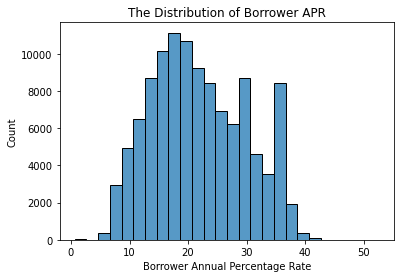

In [34]:
# Histogram for Borrower APR
bins = ['0%', '10%', '20%', '30%', '40%', '50%']
b_APR = df_vis['BorrowerAPR'] * 100 
sb.histplot(df_vis, x=b_APR, binwidth=2);
plt.xlabel("Borrower Annual Percentage Rate");
plt.title("The Distribution of Borrower APR");

**Exploring The Loan Status**

It's very important for us to see how many of the custemers are done wirh the payments. Around 38 thousand are done and 54 thousand are still making their payments on time.

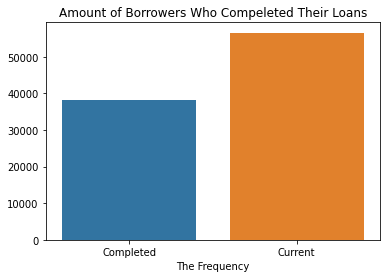

In [63]:
# Bar Chart for Borrower State

# Get the counts for each category
comp = len(df_vis[df_vis['LoanStatus'] == 'Completed'])
curr = len(df_vis[df_vis['LoanStatus'] == 'Current'])

y = [comp, curr]
x = ['Completed', 'Current']

# Bar Chart
sb.barplot( x=x, y=y);
plt.xlabel("The Status of Loans");
plt.xlabel("The Frequency");
plt.title("Amount of Borrowers Who Compeleted Their Loans");

**Exploring The Debt to Income Ratios with The Loan Status**

Here we see how the credit score has no correlation with the debt to income ratio. However, we see a clear concentration on the lower portion of the debt to income ratio, which is a good sign. Meaning borrowers won't be crushed by their debts. Nevertheless, there is a signficant portion of borrowers with loans 2 and 3 times their income which is fairly okay. But 9 and 19 times their income become dangerous and default rates increase as we see in the past due dots.

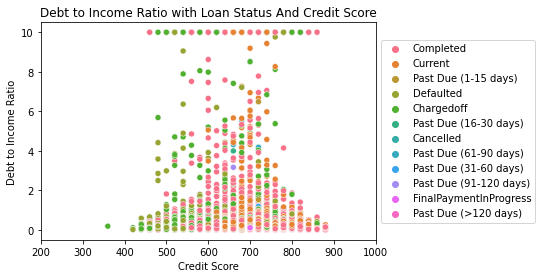

In [60]:
# Scatter Plot for credit score range
sb.scatterplot(data=df_vis, x='CreditScoreRangeLower', y='DebtToIncomeRatio', hue='LoanStatus');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlim(200,1000);
plt.xlabel("Credit Score");
plt.ylabel("Debt to Income Ratio")
plt.title("Debt to Income Ratio with Loan Status And Credit Score");


### **Explanatory Phase**



> Here we will answer some of the questions about our loans using plots



**Questions:**


*   Will our brrowers be willing to pay their loans based on income?
*   Does Brrower APR differ based on the Credit Score?



**Will the borrowers be willing to pay their loans based on income?**

The answer is YES. more than 90% will pay their loans. So, we will have a very small default rate

In [ ]:
# The proportion of people with loans less than their income in our sample
df_vis[df_vis['DebtToIncomeRatio'] < 1]['DebtToIncomeRatio'].count()/df_vis.shape[0]


0.9177879003308846

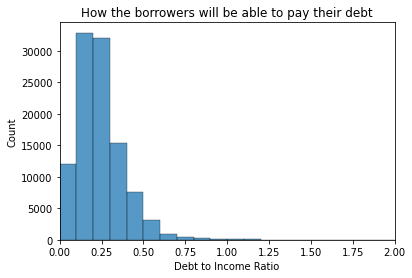

In [ ]:
# First Question
# Histogram of debt to income ratio
sb.histplot(data=df_vis, x='DebtToIncomeRatio', binwidth=.1);
plt.xlim(0,2)
plt.xlabel("Debt to Income Ratio");
plt.title("How the borrowers will be able to pay their debt");

**Does Borrower APR Differ Based on The Credit Score?**

We don't see a clear correlation between the credit score and the APR. Perhaps that depends on the different types of loans. However, we notice that the available bank card credit are low with low credit scores but high with higher credit scores as they approach the $50,000 mark. 

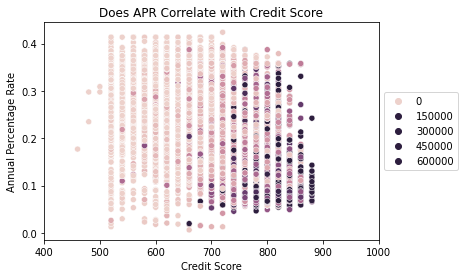

In [ ]:
# Second Question
# Scatterplot of Borrower APR and Credit Score and the amount in credit
sb.scatterplot(data=df_vis, x='CreditScoreRangeLower', y='BorrowerAPR', hue='AvailableBankcardCredit', hue_norm=(0,50000));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlim(400, 1000);
plt.xlabel("Credit Score");
plt.ylabel("Annual Percentage Rate");
plt.title("Does APR Correlate with Credit Score");